In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
trp_revenue = pd.read_excel('TRP_VENITURI.xlsx')
building_permits = pd.read_excel('building_permitsVALORI.xlsx')
investment_costs = pd.read_excel('ch_cu_investitii.xlsx')
construction_index = pd.read_excel('Construction_index_anual.xlsx')
# 2. Data Cleaning
# Remove spaces from 'Millions RON' and convert to numeric
trp_revenue['Millions RON'] = (trp_revenue['Millions RON']
                               .astype(str)
                               .str.replace(' ', '')
                               .astype(float))

In [3]:
trp_revenue = trp_revenue.sort_values('Year')
building_permits = building_permits.sort_values('Year')
investment_costs = investment_costs.sort_values('Year')
construction_index = construction_index.sort_values('Year')

In [4]:
merged_df = trp_revenue.merge(building_permits, on='Year', how='inner')
merged_df = merged_df.merge(investment_costs, on='Year', how='inner')
merged_df = merged_df.merge(construction_index, on='Year', how='inner')

In [5]:
correlation_matrix = merged_df.corr()
# Extract correlations specifically with TRP Revenue
correlations = correlation_matrix['Millions RON']

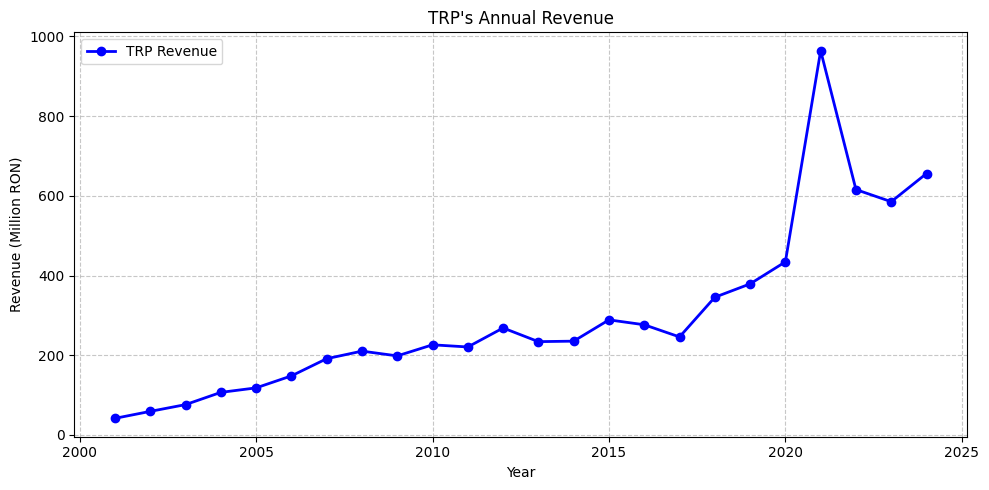

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(trp_revenue['Year'], trp_revenue['Millions RON'] / 1e6,
         marker='o', color='blue', linewidth=2, label='TRP Revenue')
plt.title("TRP's Annual Revenue")
plt.ylabel('Revenue (Million RON)')
plt.xlabel('Year')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()  # Display first graph immediately

--- Plot 2: Building Permits ---

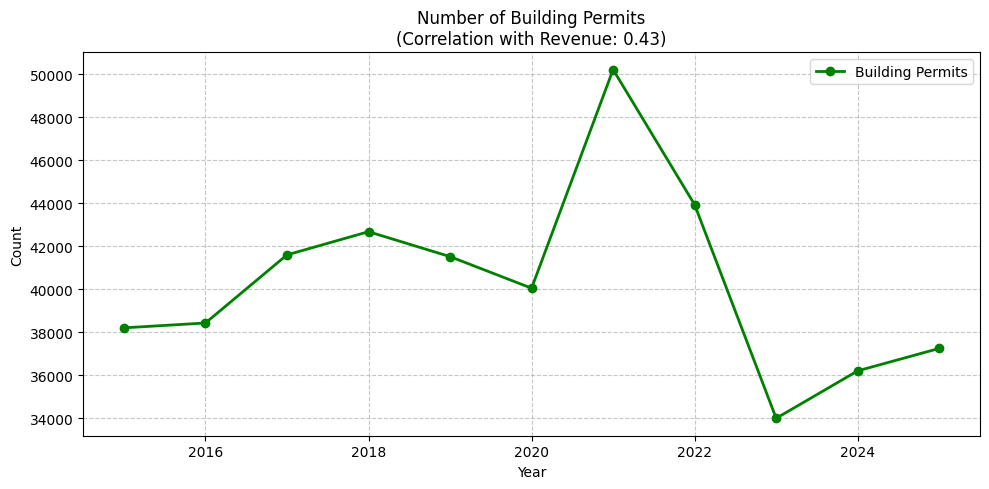

In [7]:
corr_permits = correlations['Number of Building Permits']
plt.figure(figsize=(10, 5))
plt.plot(building_permits['Year'], building_permits['Number of Building Permits'],
         marker='o', color='green', linewidth=2, label='Building Permits')
plt.title(f'Number of Building Permits\n(Correlation with Revenue: {corr_permits:.2f})')
plt.ylabel('Count')
plt.xlabel('Year')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show() # Display second graph

--- Plot 3: Construction Index ---

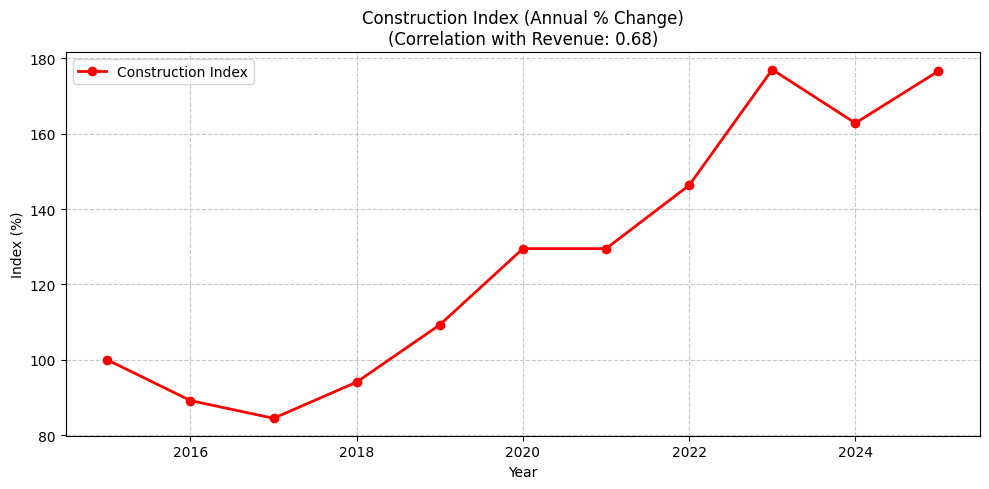

In [8]:
corr_index = correlations['%change']
plt.figure(figsize=(10, 5))
plt.plot(construction_index['Year'], construction_index['%change'],
         marker='o', color='red', linewidth=2, label='Construction Index')
plt.title(f'Construction Index (Annual % Change)\n(Correlation with Revenue: {corr_index:.2f})')
plt.ylabel('Index (%)')
plt.xlabel('Year')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show() # Display third graph

--- Plot 4: Government Investment ---

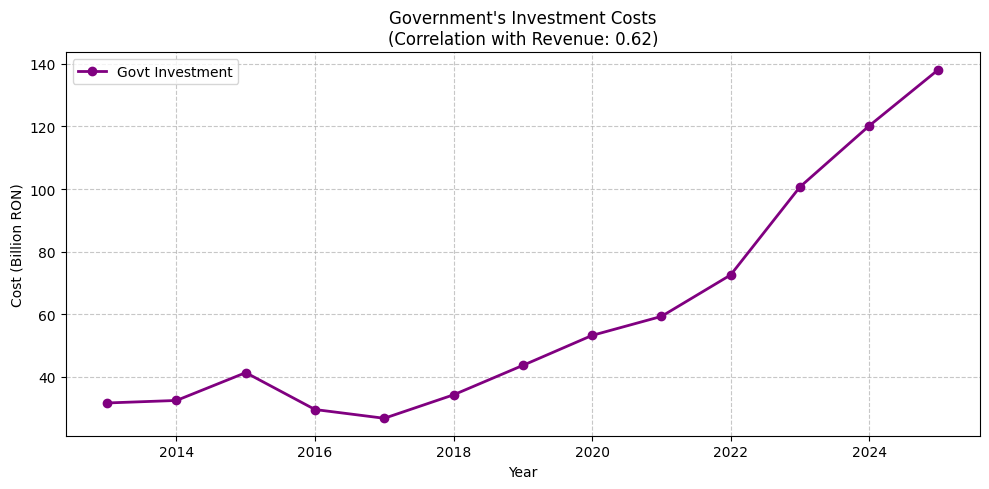

In [9]:
corr_invest = correlations['Investment costs - Billion RON']
plt.figure(figsize=(10, 5))
plt.plot(investment_costs['Year'], investment_costs['Investment costs - Billion RON'],
         marker='o', color='purple', linewidth=2, label='Govt Investment')
plt.title(f"Government's Investment Costs\n(Correlation with Revenue: {corr_invest:.2f})")
plt.ylabel('Cost (Billion RON)')
plt.xlabel('Year')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show() # Display fourth graph

Print correlations to console

In [10]:
print("Calculated Correlations with TRP Revenue:")
print(f"Construction Index: {corr_index:.4f}")
print(f"Government Investment: {corr_invest:.4f}")
print(f"Building Permits: {corr_permits:.4f}")

Calculated Correlations with TRP Revenue:
Construction Index: 0.6782
Government Investment: 0.6189
Building Permits: 0.4321
